In [1]:
import numpy as np
import cv2
from math import pi
import skimage.io as io

In [7]:
def simplestColorBalance(img,s):
    s/=100
    n,m=img.shape
    f=img.flatten()
    f.sort()
    minT=f[int(s*n*m)]
    maxT=f[ n*m - int(s*n*m) - 1]
    img=np.where(img<minT,0,img)
    img=np.where(img>maxT,255,img)
    img=np.where((img!=0)&(img!=255),255*((img-minT)/(maxT-minT)),img)
    return img

In [8]:
def poisonScreening(img,L):
    n,m=img.shape
    img_freq=cv2.dft(img)
    for i in range(n):
        for j in range(m):
            coef=(pi*pi*i*i)/(n*n) + (pi*pi*j*j)/(m*m)
            img_freq[i][j]=(img_freq[i][j]*coef)/(L+coef)
    img=cv2.idft(img_freq)
    return img

In [13]:
def applyPoison(imgDist,s,L):
    img=cv2.imread(imgDist,0)
    img=simplestColorBalance(img,s)
    cv2.imwrite('Balanced.png',img)
    img=poisonScreening(img,L)
    cv2.imwrite('poison.png',img)
    img=simplestColorBalance(img,s)
    cv2.imwrite('final.png',img)
    return img

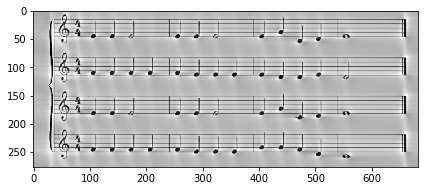

In [16]:


img=applyPoison("note.png",0.1,0.1)
io.imshow(img/255)
io.show()
